# Weather vs. Latitude
## Data retrieved 5-10-2019
----

### Analysis
* Temperature increases as one approaches the equator (latitude 0).  There is a large number of cities in the nothern hemisphere that are colder than the temperature range seen in the southern hemisphere.
* Humidity ranges from 60% to 100% in a narrow window (-5, 5) near the equator.  Outside of this window, we see much more variation in humidity percents.  In the northern hemisphere, humidities range from just above 0% to 100%.  In the souther hemisphere, humidities range from 20% to 100%.
* There is not a relationship between latitude and wind speed.  Below latitude -40 and above latitude 40, there is a number of cities with wind speeds over 20 mph.
* Cloudiness does not appear to depend on latitude.  There are noticeable bands of cities with cloudiness at 0%, 20%, 40%, 75% and 90%.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import seaborn as sns

# Used to 
from datetime import datetime 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("", "output_data", "cities-05-10-2019.csv")
OUTPUT_PLOT_PATH = os.path.join("", "output_data")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
#### Openweathermap api restricted to 60 calls per minute.  Breakup data and perform timing breaks
# to prevent exceeding 60 calls per minute

def get_weather_results(cities, chunk_size = 50, units = "imperial"):
    
    SUCCESSFUL_API_CALL = 200 # Successful API code 
    url = "http://api.openweathermap.org/data/2.5/weather?"

    # Helper function 
    def print_separator(what="-", length=40):
        print(what*length)
    
    # Split the list of cities into lists of size 
    #num_chunks = (len(cities) + chunk_size - 1) // chunk_size
    #city_chunks = np.array_split(cities, num_chunks)
    city_chunks = [cities[i:i+chunk_size] for i in range(0, len(cities), chunk_size)]
    
    weather_results = []

    print("Beginning Data Retrieval")
    print_separator()
    
    chunk_number = 1
    for chunk in city_chunks:
        city_number = 1
        for city in chunk:
        
            # Build query URL and request your results in requested units
            query_url = f"{url}appid={api_key}&q={city}&units={units}"

            # Get weather data
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()
        
            if weather_json['cod'] == SUCCESSFUL_API_CALL:
                print(f"Processing Record {city_number} of Set {chunk_number} | {city}")
                weather_results.append({'City' : city,\
                                        'Cloudiness' : weather_json['clouds']['all'],\
                                        'Country' : weather_json['sys']['country'],\
                                        'Date' : weather_json['dt'],\
                                        'Humidity' : weather_json['main']['humidity'],\
                                        'Lat' : weather_json['coord']['lat'],\
                                        'Lng' : weather_json['coord']['lon'],\
                                        'Max Temp' : weather_json['main']['temp_max'],\
                                        'Wind Speed' : weather_json['wind']['speed']})
            else:
                print(f"{weather_json['message'].capitalize()}.  Skipping...")
                      
            # Add a 60/chunk_size second interval between queries to stay within API query limits
            time.sleep(60/chunk_size)
                  
            city_number += 1
        chunk_number += 1
    
    print_separator()
    print("Data Retrieval Complete")                  
    print_separator()
    
    return weather_results

# Get the results
weather_results = get_weather_results(cities)


Beginning Data Retrieval
----------------------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | erzin
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | beringovskiy
Processing Record 6 of Set 1 | whakatane
Processing Record 7 of Set 1 | oriximina
Processing Record 8 of Set 1 | nishihara
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | vostok
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | imbituba
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | leningradskiy
City not found.  Skipping...
Processing Record 18 of Set 1 | malanje
Processing Record 19 of Set 1 | karakol
Processing Record 20 of Set 1 | cherskiy
Processing Record 21 of Set 1 | saint george
Processing Record 22 of Set 1 | viedma
Processing Record 23 of Set 1 | petropavlovsk-kamcha

Processing Record 5 of Set 5 | san pedro
Processing Record 6 of Set 5 | sinnamary
Processing Record 7 of Set 5 | atar
Processing Record 8 of Set 5 | temeni
Processing Record 9 of Set 5 | tevaitoa
Processing Record 10 of Set 5 | kruisfontein
Processing Record 11 of Set 5 | clyde river
City not found.  Skipping...
Processing Record 13 of Set 5 | inhambane
Processing Record 14 of Set 5 | zhigansk
Processing Record 15 of Set 5 | faya
Processing Record 16 of Set 5 | hluti
Processing Record 17 of Set 5 | kamenka
Processing Record 18 of Set 5 | burns lake
Processing Record 19 of Set 5 | benghazi
City not found.  Skipping...
Processing Record 21 of Set 5 | abu samrah
City not found.  Skipping...
Processing Record 23 of Set 5 | paidha
City not found.  Skipping...
Processing Record 25 of Set 5 | lask
City not found.  Skipping...
City not found.  Skipping...
Processing Record 28 of Set 5 | ilhabela
Processing Record 29 of Set 5 | nanyang
Processing Record 30 of Set 5 | tuatapere
City not found.  

Processing Record 13 of Set 9 | barabai
Processing Record 14 of Set 9 | nyrob
Processing Record 15 of Set 9 | reitz
Processing Record 16 of Set 9 | sakaiminato
Processing Record 17 of Set 9 | mayumba
Processing Record 18 of Set 9 | pallipattu
Processing Record 19 of Set 9 | buala
Processing Record 20 of Set 9 | comodoro rivadavia
Processing Record 21 of Set 9 | bezenchuk
Processing Record 22 of Set 9 | nhulunbuy
Processing Record 23 of Set 9 | burayevo
Processing Record 24 of Set 9 | fasa
Processing Record 25 of Set 9 | sampang
Processing Record 26 of Set 9 | alekseyevka
Processing Record 27 of Set 9 | boshkengash
Processing Record 28 of Set 9 | abha
Processing Record 29 of Set 9 | saldanha
Processing Record 30 of Set 9 | alexandria
Processing Record 31 of Set 9 | oktyabrskoye
City not found.  Skipping...
Processing Record 33 of Set 9 | kavieng
Processing Record 34 of Set 9 | muniz freire
Processing Record 35 of Set 9 | lata
Processing Record 36 of Set 9 | kloulklubed
City not found.  

### Convert Raw Data to DataFrame

In [4]:
weather_df = pd.DataFrame(weather_results)

In [5]:
# The index is not needed in the csv file since it is just 0, 1, ...
weather_df.to_csv(output_data_file, index=False)

In [2]:
# When coming back to the problem, it is not necessary to
# run each API call again - just read in our CSV file:
weather_df = pd.read_csv(output_data_file)

In [3]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tasiilaq,14,GL,1557525000,64,65.61,-37.64,33.80,4.70
1,ushuaia,20,AR,1557525600,49,-54.81,-68.31,46.40,14.99
2,erzin,75,TR,1557528829,87,36.95,36.20,62.01,4.70
3,busselton,36,AU,1557528397,89,-33.64,115.35,39.99,9.80
4,beringovskiy,77,RU,1557528871,89,63.05,179.32,27.49,11.97


### Summary plots
I have a generic function below which can be used to generate all of the plots.  We print the date the data was retrieved using the `datetime` module.

In [4]:
# A function to perform the plotting.

def plot_weather_data(df, x, y, xlabel="", ylabel="", title="", filename=None):
    """Produce scatter plots for the weather data.
    
    Args:
        df: a pandas dataframe
        x: a column name in a pandas dataframe for plotting on x-axis
        y: a column name in a pandas dataframe for plotting on y-axis
        xlabel: the x-axis label
        ylabel: the y-axis label
        title: the title to produce on the plot
        filename: filename for saving .png file.  If `None`, no file is saved.
        **kwargs: addtional plot parameters passed to matplotlib.pyplot.scatter
    """
    # Function required matplotlib.pyplot being imported as plt
    
    ax = sns.lmplot(x=x, y=y, lowess=True, data=df)
    #plt.scatter(df[x], df[y], **kwargs)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if filename is not None:
        plt.savefig(filename)
    plt.show()

# For the plot titles, get the date the data was retrived:
# from datetime import datetime
ts = weather_df.loc[0, 'Date'] #openweathmap api returns GMT unix timestamp
retrieval_date = datetime.utcfromtimestamp(ts).strftime('%m/%d/%Y')

#### Latitude vs. Temperature Plot

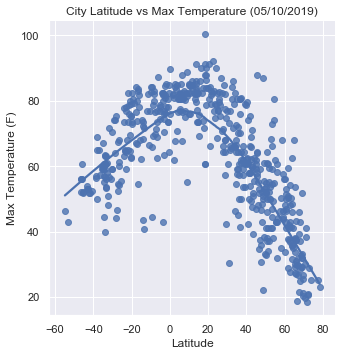

In [5]:
# Using the function, retrieval_date, and plot_options defined above
sns.set()
plot_weather_data(weather_df, 'Lat', 'Max Temp',\
                 xlabel="Latitude", ylabel="Max Temperature (F)",\
                 title=f"City Latitude vs Max Temperature ({retrieval_date})",\
                 filename=os.path.join("", OUTPUT_PLOT_PATH, "Fig1.png"))


#### Latitude vs. Humidity Plot

In [6]:
# Check if there are observations with Humidity greater than 100
sum(weather_df.Humidity > 100)

2

In [7]:
# Which observations?
weather_df[weather_df.Humidity > 100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
447,iquitos,40,PE,1557525600,319,-3.75,-73.25,42.8,5.82
496,chazuta,40,PE,1557525600,290,-6.57,-76.13,62.6,6.93


In [8]:
# Work with the observations that have humidity less than or equal to 100%
sub_df = weather_df.loc[weather_df.Humidity <= 100, :]
sub_df.shape

(535, 9)

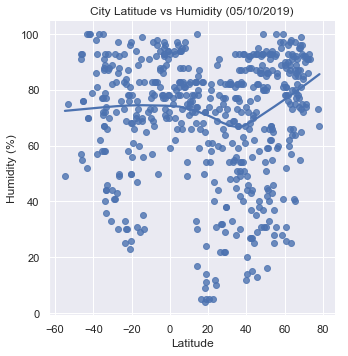

In [9]:
# Using the function, retrieval_date, and plot_options defined above
plot_weather_data(sub_df, 'Lat', 'Humidity',\
                 xlabel="Latitude", ylabel="Humidity (%)",\
                 title=f"City Latitude vs Humidity ({retrieval_date})",\
                 filename=os.path.join("", OUTPUT_PLOT_PATH, "Fig2.png"))


#### Latitude vs. Cloudiness Plot

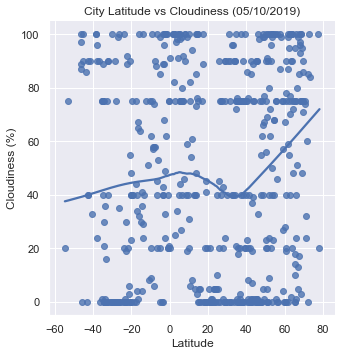

In [10]:
# Using the function, retrieval_date, and plot_options defined above
plot_weather_data(weather_df, 'Lat', 'Cloudiness',\
                 xlabel="Latitude", ylabel="Cloudiness (%)",\
                 title=f"City Latitude vs Cloudiness ({retrieval_date})",\
                 filename=os.path.join("", OUTPUT_PLOT_PATH, "Fig3.png"))


#### Latitude vs. Wind Speed Plot

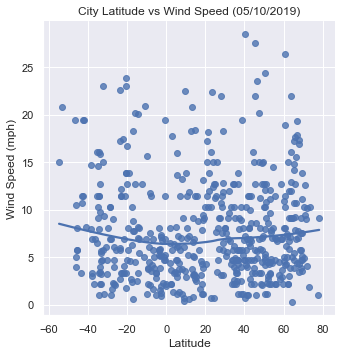

In [11]:
# Using the function, retrieval_date, and plot_options defined above
plot_weather_data(weather_df, 'Lat', 'Wind Speed',\
                 xlabel="Latitude", ylabel="Wind Speed (mph)",\
                 title=f"City Latitude vs Wind Speed ({retrieval_date})",\
                 filename=os.path.join("", OUTPUT_PLOT_PATH, "Fig4.png"))


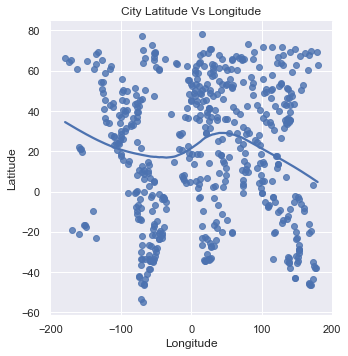

In [12]:
# For fun - the latitude and longitude locations of our cities.
plot_weather_data(weather_df, 'Lng', 'Lat',\
                 xlabel="Longitude", ylabel="Latitude",\
                 title="City Latitude Vs Longitude",\
                 filename=os.path.join("", OUTPUT_PLOT_PATH, "cities.png"))


C:\Users\dadra\anaconda\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


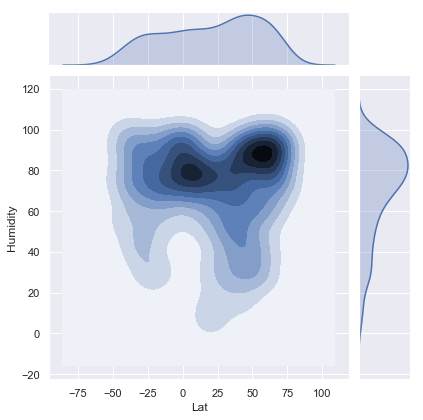

In [13]:
sns.jointplot("Lat", "Humidity", kind="kde", data=sub_df)
plt.savefig(os.path.join("", OUTPUT_PLOT_PATH, "humidity-joint.png"))

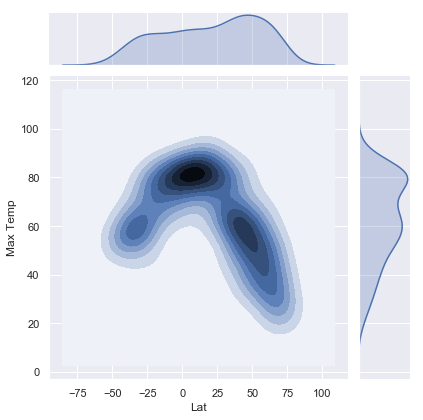

In [14]:
sns.jointplot("Lat", "Max Temp", kind="kde", data=sub_df)
plt.savefig(os.path.join("", OUTPUT_PLOT_PATH, "temp-joint.png"))

In [15]:
plt.savefig(os.path.join("", OUTPUT_PLOT_PATH, "temp-joint.png"))

<Figure size 432x288 with 0 Axes>

In [16]:
plt.savefig(os.path.join("", OUTPUT_PLOT_PATH, "humidity-joint.png"))

<Figure size 432x288 with 0 Axes>

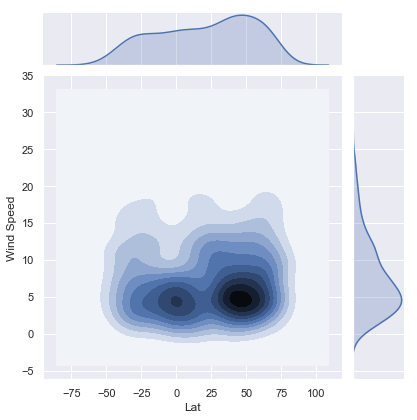

In [17]:
sns.jointplot("Lat", "Wind Speed", kind="kde", data=sub_df)
plt.savefig(os.path.join("", OUTPUT_PLOT_PATH, "wind-joint.png"))

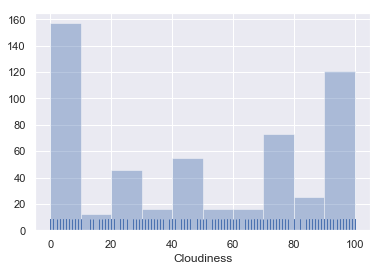

In [18]:
sns.distplot(weather_df.Cloudiness, bins=10, kde=False, hist=True, rug=True)
plt.savefig(os.path.join("", OUTPUT_PLOT_PATH, "cloudhist.png"))

In [19]:
plt.savefig(os.path.join("", OUTPUT_PLOT_PATH, "cloudhist.png"))

<Figure size 432x288 with 0 Axes>

In [20]:
# Divide latitudes into 5 categories based on quantiles
latc = pd.qcut(sub_df['Lat'], 5)
sub_df['Lats'] = latc
sub_df.head()

C:\Users\dadra\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Lats
0,tasiilaq,14,GL,1557525000,64,65.61,-37.64,33.80,4.70,"(53.182, 78.22]"
1,ushuaia,20,AR,1557525600,49,-54.81,-68.31,46.40,14.99,"(-54.811, -16.152]"
2,erzin,75,TR,1557528829,87,36.95,36.20,62.01,4.70,"(36.42, 53.182]"
3,busselton,36,AU,1557528397,89,-33.64,115.35,39.99,9.80,"(-54.811, -16.152]"
4,beringovskiy,77,RU,1557528871,89,63.05,179.32,27.49,11.97,"(53.182, 78.22]"


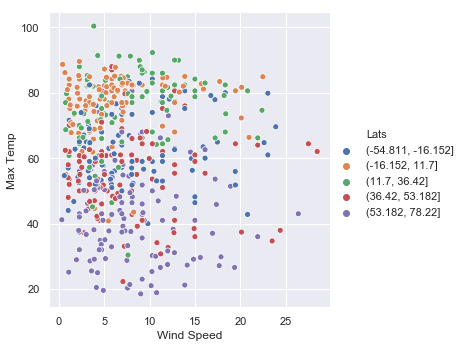

In [21]:
sns.relplot("Wind Speed", "Max Temp", hue="Lats", data=sub_df)

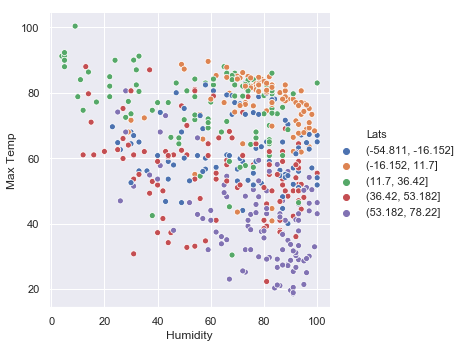

In [22]:
sns.relplot("Humidity", "Max Temp", hue="Lats", data=sub_df)

C:\Users\dadra\anaconda\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


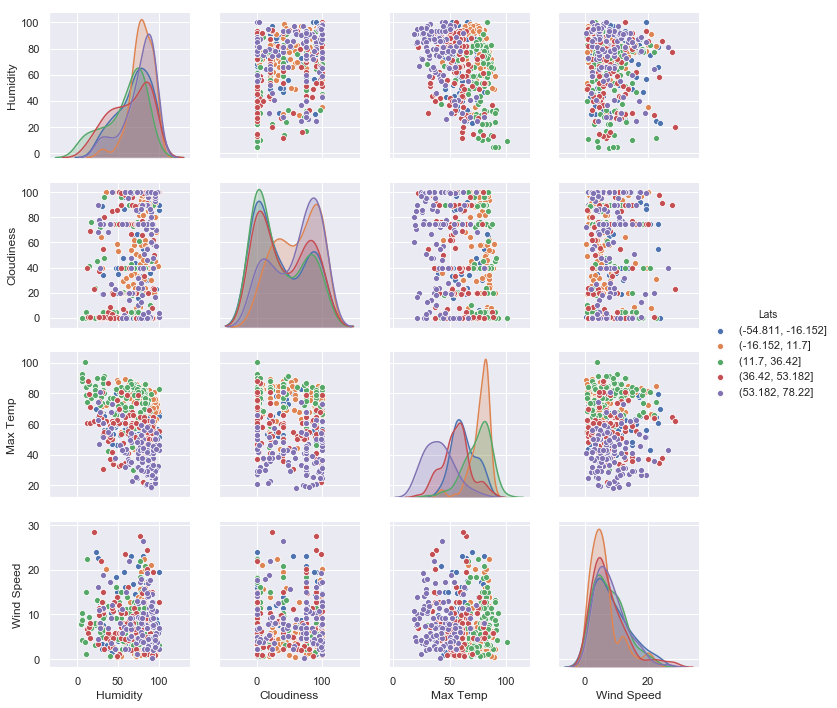

In [23]:
sns.pairplot(sub_df, vars=["Humidity", "Cloudiness", "Max Temp", "Wind Speed"], hue="Lats")
plt.savefig(os.path.join("", OUTPUT_PLOT_PATH, "pairs.png"))

In [24]:
plt.savefig(os.path.join("", OUTPUT_PLOT_PATH, "pairs.png"))

<Figure size 432x288 with 0 Axes>